# **NLP - Análise de Sentimentos**

### Bibliotecas

In [115]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB

from sklearn.utils import shuffle

## Aquisição de dados

Os dataset foi baixado do site Kaggle. 

link: https://www.kaggle.com/luisfredgs/imdb-ptbr

IMDB PT-BR
Tradução do dataset IMdb para o português

In [4]:
df = pd.read_csv('data/imdb-reviews-pt-br.csv')
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


#### Qual a quantidade de comentários?

In [5]:
df.shape[0]

49459

#### Quais os sentimentos encontrados?

In [6]:
np.unique(df.sentiment)

array(['neg', 'pos'], dtype=object)

#### Existem dados faltantes?

In [7]:
df.isnull().values.any()

False

## Visualização de dados

In [8]:
#Contagem dos sentimentos das classes
df.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [9]:
#Muda as classes para um valor numérico
df['sentiment'] = df['sentiment'].map({'neg':0, 'pos':1})
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0


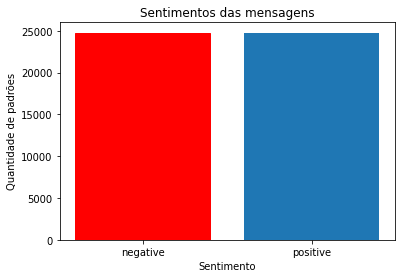

In [10]:
y = ['negative', 'positive']
x = df.sentiment.value_counts()


#Criando uma figura
barlist = plt.bar(y, x)

#Configurando cor
barlist[0].set_color('r')

#Configurando o cabeçalho
plt.xlabel('Sentimento')
plt.ylabel('Quantidade de padrões')
plt.title('Sentimentos das mensagens')

plt.show()

**OBS:** **<font color='red'>As classes de sentimentos estão balanceadas</font>**

## Pré-processamento de dados

In [11]:
# Faz copia do DataFrame
df1 = df.copy()
df1.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0


In [12]:
# Transforma todo o texto em minúsculo
df1['texto'] = [i.lower() for i in df['text_pt']]
df1.head()

,id,text_en,text_pt,sentiment,texto
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"mais uma vez, o sr. costner arrumou um filme p..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,este é um exemplo do motivo pelo qual a maiori...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"primeiro de tudo eu odeio esses raps imbecis, ..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,nem mesmo os beatles puderam escrever músicas ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,filmes de fotos de latão não é uma palavra apr...


In [13]:
# Excluir colunas que não vamos precisar
df1.drop(['id','text_en', 'text_pt'], axis='columns', inplace=True)

# Renomeia a coluna 'sentiment'
df1.rename(columns={'sentiment': 'sentimento'}, inplace = True)
df1

,sentimento,texto
0,0,"mais uma vez, o sr. costner arrumou um filme p..."
1,0,este é um exemplo do motivo pelo qual a maiori...
2,0,"primeiro de tudo eu odeio esses raps imbecis, ..."
3,0,nem mesmo os beatles puderam escrever músicas ...
4,0,filmes de fotos de latão não é uma palavra apr...
...,...,...
49454,1,"como a média de votos era muito baixa, e o fat..."
49455,1,o enredo teve algumas reviravoltas infelizes e...
49456,1,estou espantado com a forma como este filme e ...
49457,1,a christmas together realmente veio antes do m...


In [25]:
# Mistura os dados
df2 = shuffle(df1)
df2

,sentimento,texto
20964,1,eu vi alguns filmes do extremo oriente recente...
7806,0,lou costello sans abbott interpreta uma pequen...
15571,1,muitos atores experientes e excelentes se mist...
7662,0,eu aluguei este filme porque eu amo kristanna ...
31822,0,os filmes rks sempre foram filmes comerciais q...
...,...,...
47302,1,assim como tom berenger colocou você na alma d...
3731,0,"eu vi alguns filmes ruins em meus dias, muitos..."
46010,1,"o thriller inteligente, elegante e atraente do..."
44129,1,"eu vi ""a page of madness"" em um curso de cinem..."


In [27]:
# Separa os dados em atributo e target
X = df2['texto']
y = df2['sentimento']

## Processamento de dados

In [33]:
# Instância classe de vetorização
vectorizer = CountVectorizer(analyzer = "word")

# Transforma os dados de treinamento em atributos vetorizados
X_freq = vectorizer.fit_transform(X)

In [113]:
# Instância o algoritmo
modelo = MultinomialNB()

# Metricas de avaliação
metrics = ['accuracy','f1','precision','recall']

# Cross validação
results = cross_validate(modelo, X_freq, y, return_train_score=False, scoring=metrics)

# Resultados de acurácia e dispensão
print('Acurácia',round(results['test_accuracy'].mean()*100,2),'+/-',round(results['test_accuracy'].std()*100,2), '(%)')

# Resultados de perfomance
resultsNB = pd.DataFrame(results)
resultsNB.mean()

Acurácia 84.96 +/- 0.22 (%)


fit_time          0.379799
score_time        0.084001
test_accuracy     0.849552
test_f1           0.845707
test_precision    0.866586
test_recall       0.825828
dtype: float64

In [ ]:
# Instância o algoritmo
modelo = MultinomialNB()

# Metricas de avaliação
metrics = ['accuracy','f1','precision','recall']

# Cross validação
results = cross_validate(modelo, X_freq, y, return_train_score=False, scoring=metrics)

# Resultados de acurácia e dispensão
print('Acurácia',round(results['test_accuracy'].mean()*100,2),'+/-',round(results['test_accuracy'].std()*100,2), '(%)')

# Resultados de perfomance
resultsNB = pd.DataFrame(results)
resultsNB.mean()